In [4]:
import requests 
import json
import os
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, os.path.join(os.getcwd(), r'scripts'))
import utility
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
alldata = pd.read_hdf(r'C:\Users\Administrator\Documents\jupyter_notebook\data\v5\futures\alldata_hourly.hdf')

In [7]:
alldata.columns

Index(['symbol', 'openPrice', 'highPrice', 'lowPrice', 'closePrice', 'volume',
       'turnover', 'zperf', 'fperf_1', 'fperf_2', 'fperf_3', 'fperf_5',
       'fperf_12', 'fperf_24', 'fperf_48', 'fperf_168', 'bperf_1', 'bperf_2',
       'bperf_3', 'bperf_5', 'bperf_12', 'bperf_24', 'bperf_48', 'bperf_168',
       'ones', 'vol', 'usd_volume', 'adv', 'adv_rnk', 'cnt', 'adv_rnk_dec',
       'inuniv', 'zperf_market', 'date', 'vwap_60m', 'vwap_30m', 'vwap_20m',
       'vwap_15m', 'vwap_10m', 'vwap_5m', 'close_1m', 'fret_1m', 'fret_5m',
       'fret_10m', 'fret_15m', 'fret_20m', 'fret_30m', 'fret_60m', 'sfret_15m',
       'alpha_bperf_24', 'tmp'],
      dtype='object')

In [9]:
utility.gfun_df('alpha_bperf_5', alldata, 'tmp', 'date', lambda x: utility.rerank(x), tgt_arr=alldata['bperf_5']/alldata['vol'], cond=alldata.inuniv)

In [14]:
utility.gfun_df('alpha_bperf_48', alldata, 'tmp', 'date', lambda x: utility.rerank(x), tgt_arr=alldata['bperf_48']/alldata['vol'], cond=alldata.inuniv)

In [10]:
utility.cgma(alldata, cn=['cnt', 'vol', 'adv'], gb=utility.xrank(alldata['alpha_bperf_5'], 10), rmod='fret', ofun_dict={}, ret_ds=[0,1,5,10,15,20,30])

,mygroup,cnt,vol,adv,med_alpha_bperf_5,min_alpha_bperf_5,max_alpha_bperf_5,0,1,5,10,15,20,30
0,0.0,134867,0.011912,356954.068500,-0.918367,-1.000000,-0.816327,0.000286,0.000094,0.000153,0.000153,0.000156,0.000143,0.000152
1,1.0,135276,0.011330,349023.554445,-0.711340,-0.815789,-0.608247,0.000166,0.000036,0.000086,0.000087,0.000089,0.000074,0.000082
2,2.0,135564,0.011083,368124.893099,-0.505155,-0.607843,-0.408163,0.000079,-0.000058,-0.000006,0.000003,0.000009,0.000007,0.000031
3,3.0,134001,0.010936,357195.572394,-0.304348,-0.407407,-0.204082,-0.000026,-0.000096,-0.000045,-0.000034,-0.000021,-0.000021,0.000004
4,4.0,138902,0.010882,367419.794477,-0.094737,-0.202020,0.000000,-0.000040,-0.000071,-0.000024,-0.000009,-0.000004,-0.000010,0.000015
5,5.0,131643,0.010784,345485.222662,0.106383,0.010101,0.204082,-0.000107,-0.000142,-0.000101,-0.000081,-0.000068,-0.000065,-0.000037
6,6.0,134033,0.010791,341505.046990,0.306122,0.204301,0.408163,-0.000134,-0.000126,-0.000087,-0.000067,-0.000059,-0.000063,-0.000045
7,7.0,133291,0.010897,344981.279095,0.510204,0.408451,0.608247,-0.000204,-0.000209,-0.000172,-0.000152,-0.000141,-0.000141,-0.000114
8,8.0,137563,0.011049,326863.237735,0.714286,0.608696,0.816327,-0.000238,-0.000212,-0.000192,-0.000177,-0.000167,-0.000166,-0.000155
9,9.0,131643,0.011935,376109.454159,0.918367,0.818182,1.000000,-0.000433,-0.000376,-0.000379,-0.000370,-0.000375,-0.000388,-0.000400


In [11]:
utility.cgma(alldata, cn=['cnt', 'vol', 'adv'], gb=utility.xrank(alldata['alpha_bperf_5'], 10), rmod='fperf', ofun_dict={})

,mygroup,cnt,vol,adv,med_alpha_bperf_5,min_alpha_bperf_5,max_alpha_bperf_5,1,2,3,5,12,24,48,168
0,0.0,134867,0.011912,356954.068500,-0.918367,-1.000000,-0.816327,0.000006,-0.000016,-0.000089,-0.000265,-0.000792,-0.002378,-0.004511,-0.014253
1,1.0,135276,0.011330,349023.554445,-0.711340,-0.815789,-0.608247,-0.000007,-0.000035,-0.000146,-0.000351,-0.000800,-0.001973,-0.004047,-0.013472
2,2.0,135564,0.011083,368124.893099,-0.505155,-0.607843,-0.408163,-0.000021,-0.000091,-0.000098,-0.000234,-0.000732,-0.001636,-0.003064,-0.010771
3,3.0,134001,0.010936,357195.572394,-0.304348,-0.407407,-0.204082,-0.000023,-0.000072,-0.000126,-0.000252,-0.000731,-0.001526,-0.003169,-0.011747
4,4.0,138902,0.010882,367419.794477,-0.094737,-0.202020,0.000000,-0.000033,-0.000095,-0.000166,-0.000307,-0.000772,-0.001518,-0.002733,-0.010016
5,5.0,131643,0.010784,345485.222662,0.106383,0.010101,0.204082,-0.000056,-0.000113,-0.000177,-0.000258,-0.000601,-0.001049,-0.002450,-0.010138
6,6.0,134033,0.010791,341505.046990,0.306122,0.204301,0.408163,-0.000073,-0.000161,-0.000252,-0.000321,-0.000710,-0.001274,-0.003286,-0.011066
7,7.0,133291,0.010897,344981.279095,0.510204,0.408451,0.608247,-0.000037,-0.000033,-0.000041,-0.000158,-0.000553,-0.000841,-0.002193,-0.008857
8,8.0,137563,0.011049,326863.237735,0.714286,0.608696,0.816327,-0.000123,-0.000245,-0.000320,-0.000429,-0.000945,-0.001540,-0.003543,-0.011785
9,9.0,131643,0.011935,376109.454159,0.918367,0.818182,1.000000,-0.000257,-0.000417,-0.000561,-0.000806,-0.001513,-0.002559,-0.004751,-0.014109


In [15]:
utility.cgma(alldata, cn=['cnt', 'vol', 'adv'], gb=utility.xrank(alldata['alpha_bperf_48'], 10), rmod='fret', ofun_dict={}, ret_ds=[0,1,5,10,15,20,30])

,mygroup,cnt,vol,adv,med_alpha_bperf_48,min_alpha_bperf_48,max_alpha_bperf_48,0,1,5,10,15,20,30
0,0.0,134884,0.011685,386003.866176,-0.918367,-1.000000,-0.816327,0.000007,-0.000035,-0.000008,-8.629326e-07,0.000012,0.000007,0.000029
1,1.0,135303,0.011144,353027.473025,-0.711340,-0.815789,-0.608247,-0.000019,-0.000072,-0.000025,-1.365325e-05,-0.000006,-0.000007,0.000027
2,2.0,135582,0.010818,357278.334399,-0.505155,-0.607843,-0.408163,0.000007,-0.000069,-0.000025,-9.489660e-06,0.000005,0.000006,0.000030
3,3.0,134030,0.010685,334002.133692,-0.304348,-0.407407,-0.204082,-0.000038,-0.000114,-0.000065,-4.894395e-05,-0.000043,-0.000045,-0.000021
4,4.0,138775,0.010616,348465.983742,-0.094737,-0.202128,0.000000,-0.000066,-0.000111,-0.000059,-3.923063e-05,-0.000028,-0.000029,-0.000004
5,5.0,131655,0.010587,316282.090452,0.106383,0.010101,0.204082,-0.000056,-0.000105,-0.000066,-5.060602e-05,-0.000043,-0.000045,-0.000013
6,6.0,134008,0.010741,317244.116699,0.306122,0.204301,0.408163,-0.000103,-0.000139,-0.000103,-9.172314e-05,-0.000086,-0.000084,-0.000063
7,7.0,133276,0.010960,339995.882103,0.510204,0.408451,0.608247,-0.000066,-0.000108,-0.000069,-5.578692e-05,-0.000045,-0.000050,-0.000038
8,8.0,137629,0.011625,343632.550499,0.714286,0.608696,0.816327,-0.000090,-0.000154,-0.000120,-1.127082e-04,-0.000111,-0.000122,-0.000120
9,9.0,131641,0.013126,460117.776140,0.918367,0.818182,1.000000,-0.000221,-0.000247,-0.000220,-2.193234e-04,-0.000230,-0.000257,-0.000289


In [16]:
utility.cgma(alldata, cn=['cnt', 'vol', 'adv'], gb=utility.xrank(alldata['alpha_bperf_48'], 10), rmod='fperf', ofun_dict={})

,mygroup,cnt,vol,adv,med_alpha_bperf_48,min_alpha_bperf_48,max_alpha_bperf_48,1,2,3,5,12,24,48,168
0,0.0,134884,0.011685,386003.866176,-0.918367,-1.000000,-0.816327,-0.000067,-0.000162,-0.000260,-0.000481,-0.001179,-0.002389,-0.005082,-0.016190
1,1.0,135303,0.011144,353027.473025,-0.711340,-0.815789,-0.608247,-0.000091,-0.000157,-0.000264,-0.000461,-0.001051,-0.001768,-0.003290,-0.012890
2,2.0,135582,0.010818,357278.334399,-0.505155,-0.607843,-0.408163,-0.000041,-0.000119,-0.000180,-0.000322,-0.000698,-0.001308,-0.002450,-0.010032
3,3.0,134030,0.010685,334002.133692,-0.304348,-0.407407,-0.204082,-0.000042,-0.000137,-0.000204,-0.000353,-0.000787,-0.001471,-0.003077,-0.010484
4,4.0,138775,0.010616,348465.983742,-0.094737,-0.202128,0.000000,-0.000061,-0.000072,-0.000115,-0.000173,-0.000480,-0.000986,-0.002233,-0.008345
5,5.0,131655,0.010587,316282.090452,0.106383,0.010101,0.204082,-0.000057,-0.000112,-0.000156,-0.000219,-0.000480,-0.001142,-0.002317,-0.008416
6,6.0,134008,0.010741,317244.116699,0.306122,0.204301,0.408163,-0.000007,-0.000073,-0.000135,-0.000237,-0.000750,-0.001355,-0.002993,-0.010364
7,7.0,133276,0.010960,339995.882103,0.510204,0.408451,0.608247,-0.000054,-0.000063,-0.000068,-0.000190,-0.000598,-0.001287,-0.002574,-0.009061
8,8.0,137629,0.011625,343632.550499,0.714286,0.608696,0.816327,-0.000055,-0.000117,-0.000210,-0.000363,-0.000903,-0.002271,-0.004633,-0.014319
9,9.0,131641,0.013126,460117.776140,0.918367,0.818182,1.000000,-0.000148,-0.000266,-0.000381,-0.000581,-0.001223,-0.002320,-0.005102,-0.016109


<AxesSubplot:xlabel='date'>

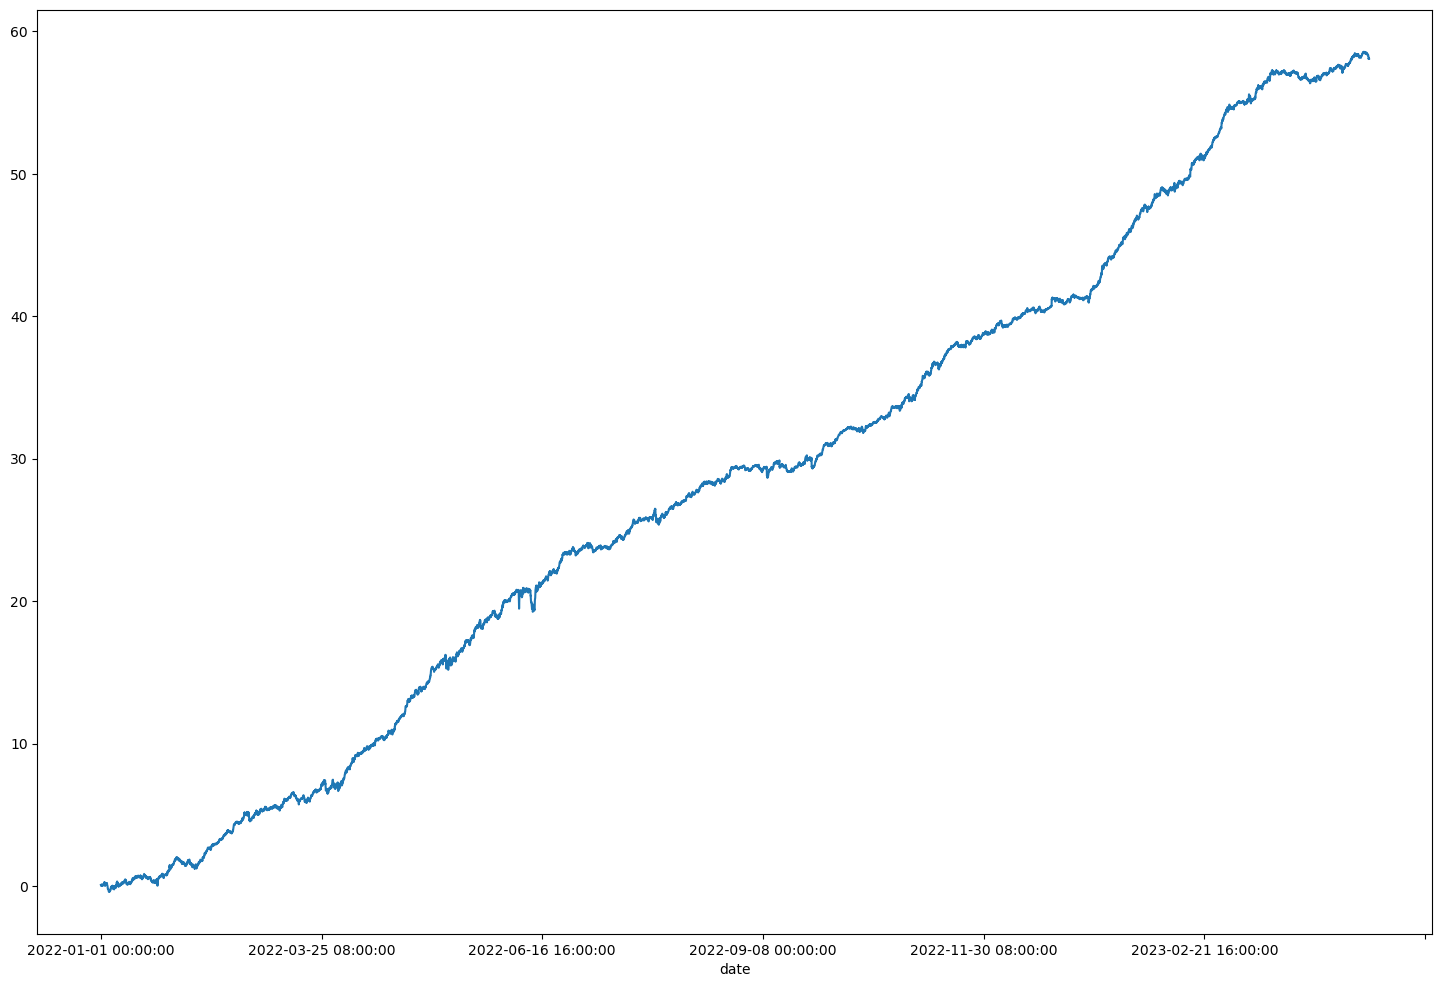

In [17]:
tfilters = (alldata.date > '2022') & alldata.inuniv & (alldata['alpha_bperf_5'].abs()>0.8)
alldata[tfilters].groupby('date').apply(lambda x: (-x['alpha_bperf_5']*x['fret_15m'].clip(-0.5,0.5)).sum()).cumsum().plot(figsize=(18,12))

<AxesSubplot:xlabel='date'>

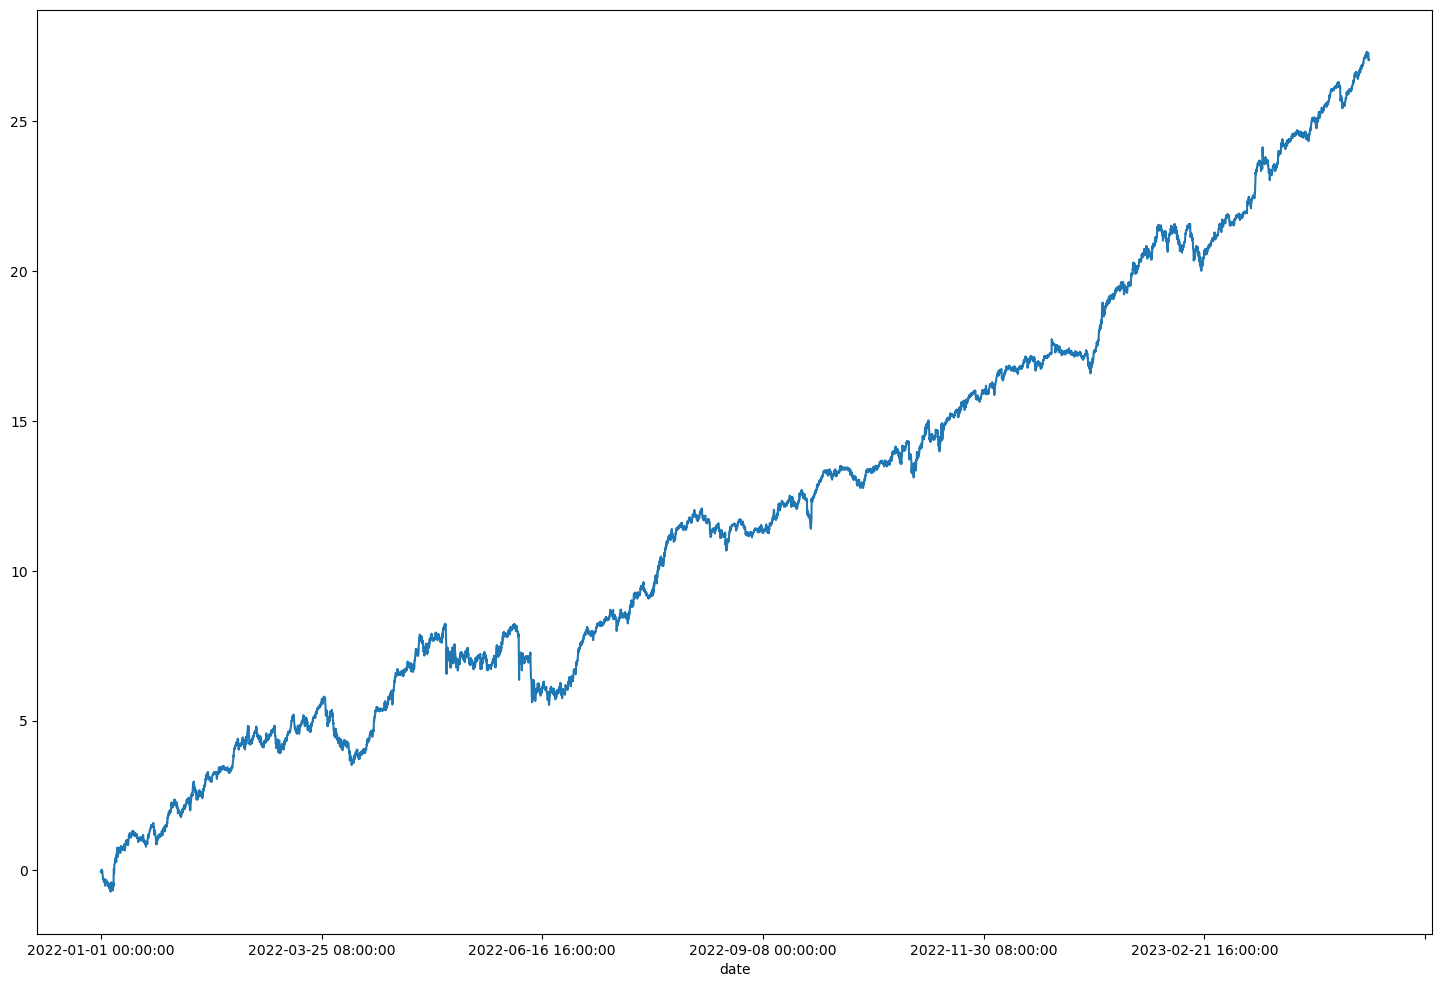

In [18]:
tfilters = (alldata.date > '2022') & alldata.inuniv & (alldata['alpha_bperf_48'].abs()>0.8)
alldata[tfilters].groupby('date').apply(lambda x: (-x['alpha_bperf_48']*x['fret_15m'].clip(-0.5,0.5)).sum()).cumsum().plot(figsize=(18,12))

avg positive weight: 9.076663171876094
avg negative weight: -9.075630564907994


,gmv,turnover,spnl(%),pnl(%),spnl_ac(%),pnl_ac(%),sretptrade,sSR,sSR_ac,retptrade,SR,SR_ac
YQ,,,,,,,,,,,,
2022Q1,18.13,0.86,40.93,37.04,40.93,37.04,2.22,9.31,9.31,2.02,6.21,6.21
2022Q2,18.13,0.87,79.27,80.78,79.27,80.78,4.17,13.30,13.30,4.25,7.30,7.30
2022Q3,18.17,0.86,45.87,38.49,45.87,38.49,2.42,8.60,8.60,2.03,6.10,6.10
2022Q4,18.18,0.87,38.63,56.18,38.63,56.18,2.01,8.32,8.32,2.92,10.00,10.00
2023Q1,18.15,0.88,58.92,90.15,58.92,90.15,3.10,10.72,10.72,4.74,12.84,12.84
2023Q2,18.17,0.85,4.92,5.81,4.92,5.81,1.00,4.46,4.46,1.18,4.21,4.21
summary,18.15,0.87,199.63,229.31,199.63,229.31,2.70,9.90,9.90,3.10,7.95,7.95


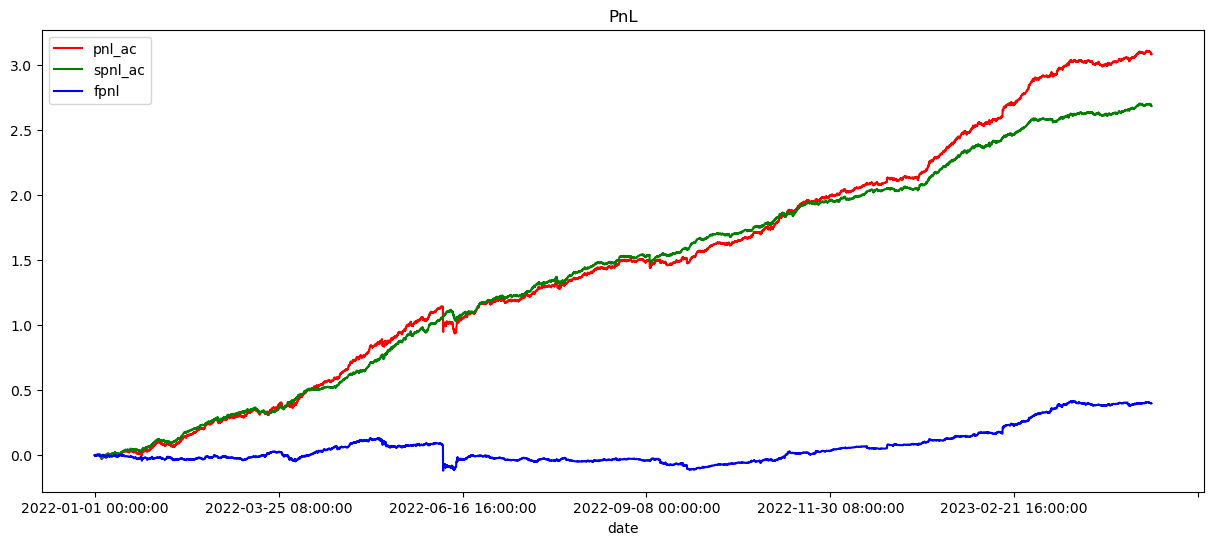

In [19]:
alldata['sig1'] = -alldata['alpha_bperf_5'] * (alldata['alpha_bperf_5'].abs()>0.8)
utility.pnldetails(alldata[alldata.date>'2022'], 'sig1', ret_col='fret_15m', sret_col='sfret_15m')

avg positive weight: 9.076663171876094
avg negative weight: -9.075630564907994


,gmv,turnover,spnl(%),pnl(%),spnl_ac(%),pnl_ac(%),sretptrade,sSR,sSR_ac,retptrade,SR,SR_ac
YQ,,,,,,,,,,,,
2022Q1,18.13,0.86,40.93,37.04,3.76,-0.13,2.22,9.31,0.86,2.02,6.21,-0.02
2022Q2,18.13,0.87,79.27,80.78,41.25,42.76,4.17,13.30,6.92,4.25,7.30,3.86
2022Q3,18.17,0.86,45.87,38.49,8.00,0.63,2.42,8.60,1.50,2.03,6.10,0.10
2022Q4,18.18,0.87,38.63,56.18,0.17,17.72,2.01,8.32,0.04,2.92,10.00,3.16
2023Q1,18.15,0.88,58.92,90.15,20.90,52.13,3.10,10.72,3.80,4.74,12.84,7.42
2023Q2,18.17,0.85,4.92,5.81,-4.90,-4.01,1.00,4.46,-4.44,1.18,4.21,-2.90
summary,18.15,0.87,199.63,229.31,51.43,81.11,2.70,9.90,2.55,3.10,7.95,2.81


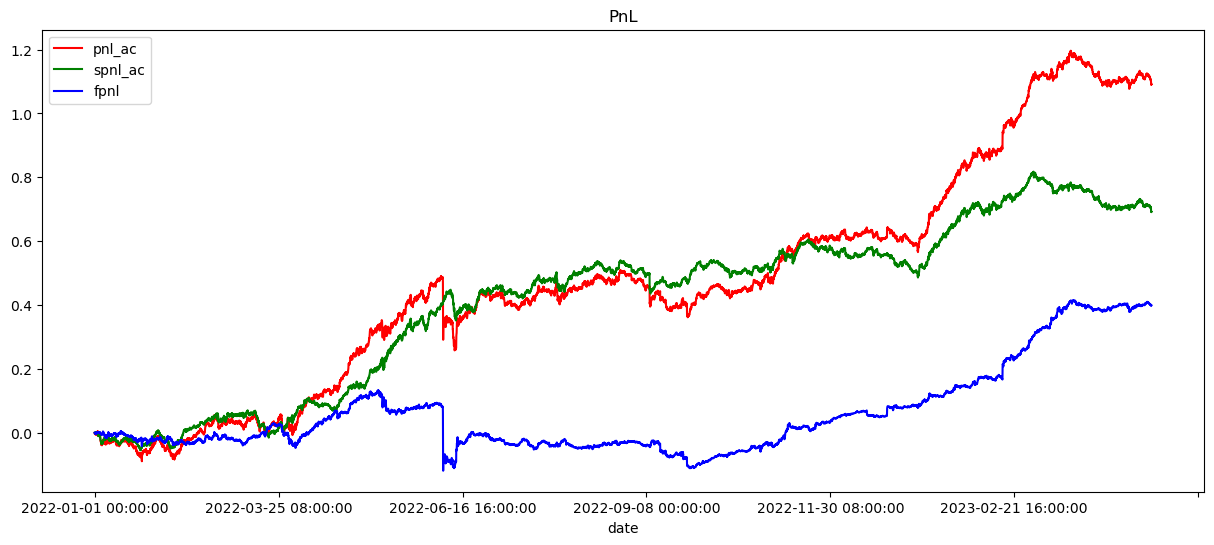

In [21]:
utility.pnldetails(alldata[alldata.date>'2022'], 'sig1', ret_col='fret_15m', sret_col='sfret_15m', tcost=2e-4)

avg positive weight: 9.075319984262565
avg negative weight: -9.075250196098047


,gmv,turnover,spnl(%),pnl(%),spnl_ac(%),pnl_ac(%),sretptrade,sSR,sSR_ac,retptrade,SR,SR_ac
YQ,,,,,,,,,,,,
2022Q1,18.13,0.32,28.72,24.01,28.72,24.01,4.12,6.70,6.70,3.43,4.05,4.05
2022Q2,18.13,0.31,14.60,5.22,14.60,5.22,2.14,2.48,2.48,0.76,0.45,0.45
2022Q3,18.17,0.33,30.45,31.62,30.45,31.62,4.21,6.55,6.55,4.38,5.25,5.25
2022Q4,18.18,0.32,13.99,22.28,13.99,22.28,2.00,3.03,3.03,3.18,3.84,3.84
2023Q1,18.15,0.33,32.28,37.62,32.28,37.62,4.58,6.01,6.01,5.34,5.44,5.44
2023Q2,18.17,0.32,12.07,13.46,12.07,13.46,6.62,11.10,11.10,7.38,9.69,9.69
summary,18.15,0.32,98.21,99.78,98.21,99.78,3.58,5.06,5.06,3.64,3.39,3.39


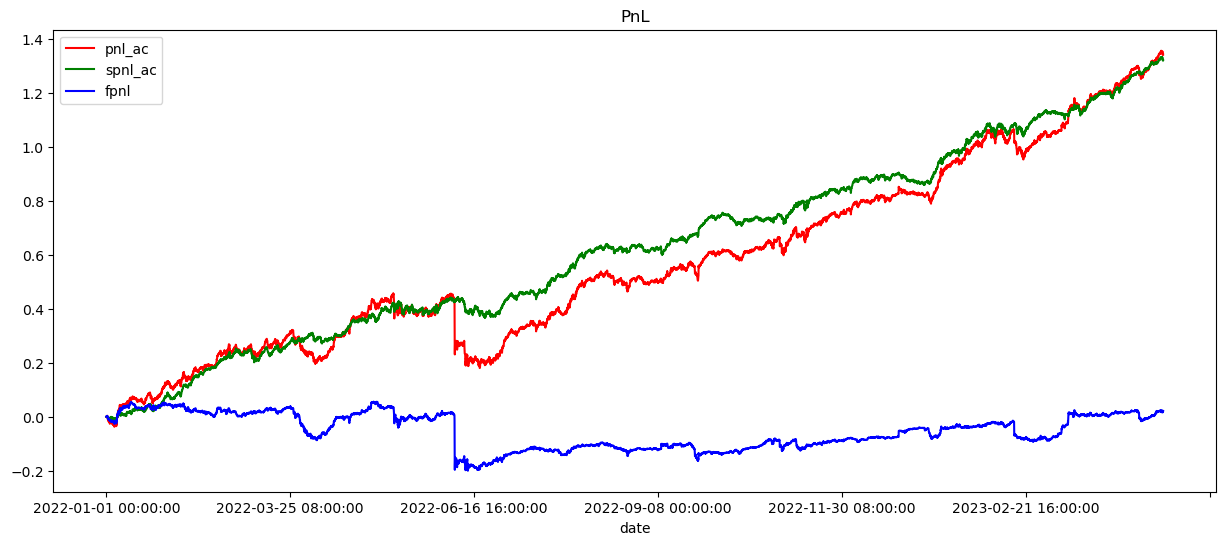

In [20]:
alldata['sig2'] = -alldata['alpha_bperf_48'] * (alldata['alpha_bperf_48'].abs()>0.8)
utility.pnldetails(alldata[alldata.date>'2022'], 'sig2', ret_col='fret_15m', sret_col='sfret_15m')

avg positive weight: 9.075319984262565
avg negative weight: -9.075250196098047


,gmv,turnover,spnl(%),pnl(%),spnl_ac(%),pnl_ac(%),sretptrade,sSR,sSR_ac,retptrade,SR,SR_ac
YQ,,,,,,,,,,,,
2022Q1,18.13,0.32,28.72,24.01,14.83,10.12,4.12,6.70,3.46,3.43,4.05,1.71
2022Q2,18.13,0.31,14.60,5.22,0.98,-8.39,2.14,2.48,0.17,0.76,0.45,-0.72
2022Q3,18.17,0.33,30.45,31.62,16.00,17.17,4.21,6.55,3.44,4.38,5.25,2.85
2022Q4,18.18,0.32,13.99,22.28,-0.01,8.29,2.00,3.03,-0.00,3.18,3.84,1.43
2023Q1,18.15,0.33,32.28,37.62,18.19,23.53,4.58,6.01,3.39,5.34,5.44,3.40
2023Q2,18.17,0.32,12.07,13.46,8.43,9.81,6.62,11.10,7.74,7.38,9.69,7.06
summary,18.15,0.32,98.21,99.78,43.43,45.00,3.58,5.06,2.24,3.64,3.39,1.53


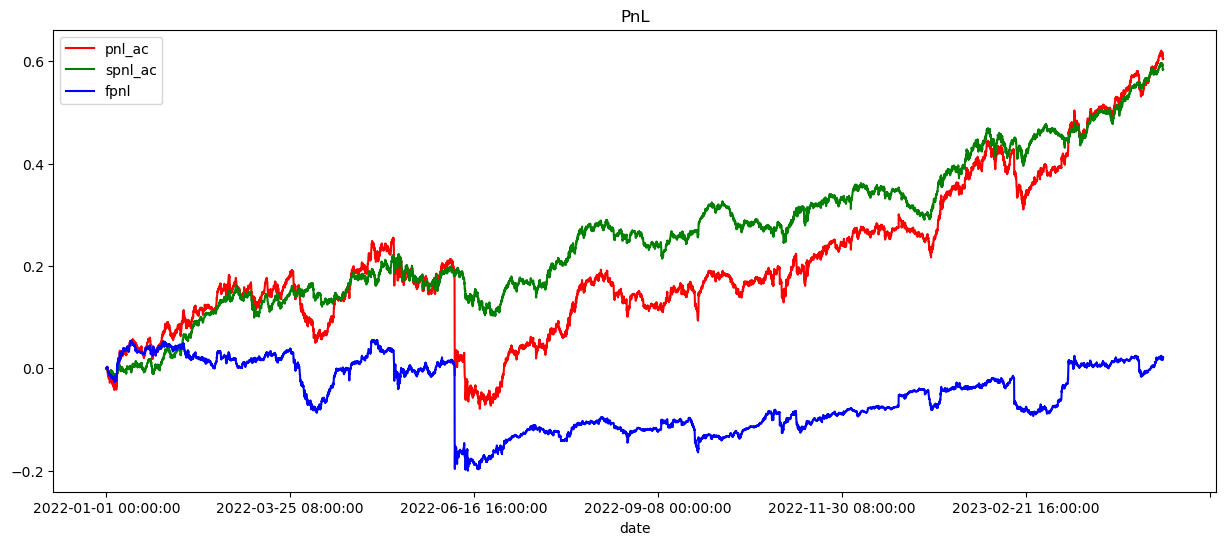

In [22]:
utility.pnldetails(alldata[alldata.date>'2022'], 'sig2', ret_col='fret_15m', sret_col='sfret_15m', tcost=2e-4)